<a href="https://colab.research.google.com/github/Harshita3007/Object_Det_Detr/blob/main/Copy_of_Read_Dataset_MSCOCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Microsoft Common Objects in Context (MS COCO) dataset is a large-scale collection of 328,000 images of everyday objects and humans, along with annotations for training machine learning models to describe, label, and recognize objects. The dataset is used for object detection, segmentation, key-point detection, and captioning tasks. It contains over 200,000 labeled images, 1.5 million object instances, 80 object categories, 91 stuff categories, and 5 captions per image.

The COCO dataset includes two main formats: JSON and image files. The JSON format includes the following attributes: Info: general information about the dataset, such as version number, date created, and contributor information.

In [1]:
#The provided code snippet utilizes the ! operator in a Jupyter Notebook or similar environment to execute shell commands within the Python code.
# Download and unzip annotations

# Download the COCO annotations dataset (train/val split for 2017)
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
# Unzip the downloaded file (annotations_trainval2017.zip)
!unzip annotations_trainval2017.zip
# Remove the downloaded zip file after unzipping (optional)
!rm annotations_trainval2017.zip
# Create a new directory named COCOdataset2017
!mkdir COCOdataset2017
# Move the unzipped annotations folder (likely named 'annotations')
# into the newly created COCOdataset2017 directory
!mv annotations COCOdataset2017/

--2024-03-22 06:41:14--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.132.89, 52.217.172.217, 52.217.108.12, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.132.89|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  92.3MB/s    in 2.6s    

2024-03-22 06:41:17 (92.3 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [2]:
# Import the COCO class from the pycocotools library for interacting with COCO annotations
from pycocotools.coco import COCO
# Import tqdm_notebook from tqdm for progress bars in Jupyter Notebooks (optional)
from tqdm import tqdm_notebook
# Import urllib.request for potential URL fetching and downloading (if needed)
import urllib.request
# Import libraries for file system interaction (os) and computer vision (cv2)
import os, cv2
# Import NumPy for numerical computations and array manipulation (common in computer vision)
import numpy as np
# Import matplotlib.pyplot for creating visualizations (plots, charts)
import matplotlib.pyplot as plt
# Set a large default figure size for plots using matplotlib (optional)
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
# Initialize COCO api for instance annotations
# COCO take the .json annotation file as input
coco = COCO('COCOdataset2017/annotations/instances_train2017.json')

loading annotations into memory...
Done (t=30.10s)
creating index...
index created!


In [4]:
# Get all categories
cats = coco.loadCats(coco.getCatIds())

# Print categories
nms=[cat['name'] for cat in cats]
print(f"{len(cats)} categories: \n{', '.join(nms)}")

80 categories: 
person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush


In [5]:
# Specify classes to download
catIds = coco.getCatIds(catNms=['person', 'car', 'bicycle'])

# Get images ids
imgIds = coco.getImgIds(catIds=catIds)

# Load images
images = coco.loadImgs(imgIds)

print(len(imgIds))
print("imgIds: ", imgIds[0])
print("images: ", images[0])

1101
imgIds:  247808
images:  {'license': 3, 'file_name': '000000247808.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000247808.jpg', 'height': 640, 'width': 378, 'date_captured': '2013-11-23 05:08:51', 'flickr_url': 'http://farm1.staticflickr.com/199/485431395_f55e8bb06d_z.jpg', 'id': 247808}


In [6]:
# Import the 'os' module for interacting with the operating system
import os

# Define the directory path to store downloaded images
im_folder = 'COCOdataset2017/images/train/'

# Create the directory if it doesn't exist
if not os.path.exists(im_folder):
    os.makedirs(im_folder)

In [7]:
import os
import urllib.request
from tqdm import tqdm

# Define the directory path to store downloaded images
im_folder = 'COCOdataset2017/images/train/'

# Create the directory if it doesn't exist
if not os.path.exists(im_folder):
    os.makedirs(im_folder)

# Download images
for im in tqdm(images):
    # Construct the full image path within the target directory
    im_path = os.path.join(im_folder, im['file_name'])  # Use os.path.join for path concatenation
    # Check if the image file already exists to avoid redundant downloads
    if not os.path.exists(im_path):
        # Download the image using urllib.request.urlretrieve
        urllib.request.urlretrieve(im['coco_url'], im_path)
        #print(f"Downloaded image: {im['file_name']}") # Optional: Print confirmation message

100%|██████████| 1101/1101 [04:32<00:00,  4.05it/s]


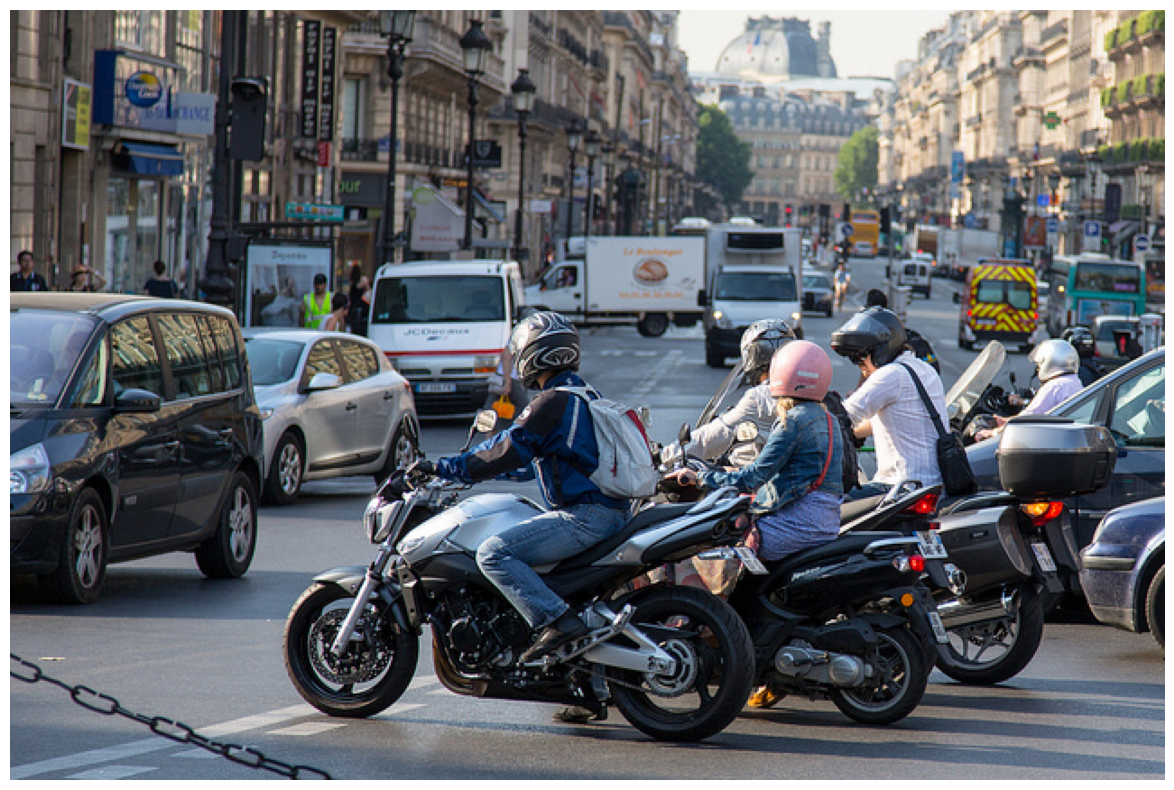

In [8]:
# Display a random image

# Select a random image from the list
img = images[np.random.randint(0, len(imgIds))]
# Assuming 'imgIds' is a list containing image IDs
# This line selects an image at a random index within the range of 0 to len(imgIds)-1

# Read the image from the file system
im = cv2.imread(im_folder + img['file_name'])
# Convert color space from BGR (OpenCV default) to RGB (expected by matplotlib)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im), plt.axis('off');

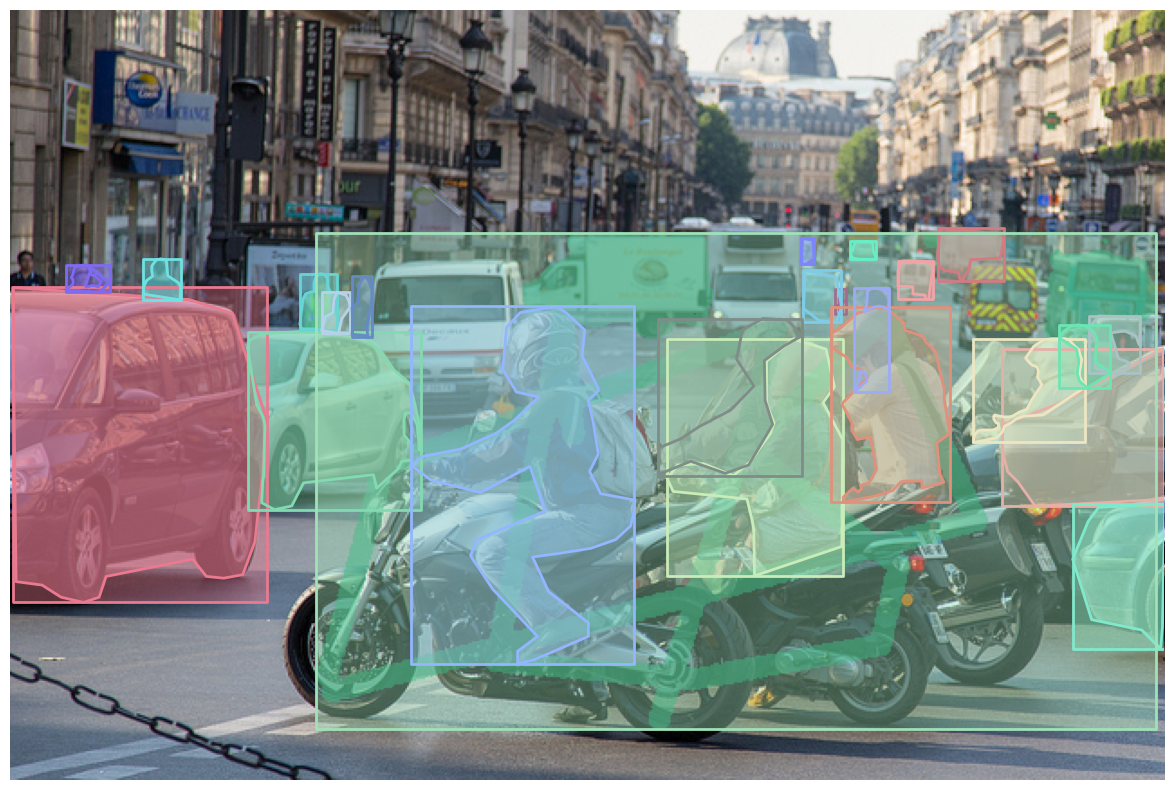

In [9]:
# Load and display instance annotations
plt.imshow(im); plt.axis('off')
# Get annotation IDs for the current image, specified categories, and both single and crowd annotations
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
# Load the annotations based on the retrieved annotation IDs
anns = coco.loadAnns(annIds)
# Display the annotations on the image
coco.showAnns(anns, draw_bbox=True) # draw_bbox=True indicates to draw bounding boxes

In [10]:
# Show bbox labels
[{nms[annot['category_id'] - 1]: annot['bbox']} for annot in anns]

[{'bicycle': [456.88, 154.48, 6.0, 13.51]},
 {'car': [0.96, 153.37, 141.05, 174.64]},
 {'car': [131.23, 177.94, 96.27, 98.67]},
 {'car': [549.82, 187.35, 90.18, 87.32]},
 {'car': [439.47, 143.93, 21.11, 28.79]},
 {'car': [598.0, 169.16, 28.4, 31.44]},
 {'car': [491.82, 138.77, 19.27, 21.27]},
 {'car': [588.8, 273.43, 51.2, 80.42]},
 {'person': [221.86, 163.87, 123.83, 198.13]},
 {'person': [363.92, 181.72, 97.32, 131.56]},
 {'person': [454.76, 164.1, 65.86, 108.3]},
 {'person': [160.21, 145.7, 20.53, 31.19]},
 {'person': [533.69, 181.78, 62.05, 57.54]},
 {'person': [359.07, 170.58, 79.6, 87.51]},
 {'person': [73.29, 137.49, 20.79, 22.82]},
 {'person': [581.42, 174.02, 28.13, 35.0]},
 {'person': [172.33, 156.08, 15.78, 22.72]},
 {'person': [189.16, 147.05, 11.06, 33.93]},
 {'person': [30.5, 140.85, 24.34, 15.23]},
 {'person': [467.56, 153.71, 19.46, 57.56]},
 {'car': [465.57, 127.78, 14.01, 10.01]},
 {'car': [438.19, 126.21, 7.23, 14.17]},
 {'car': [513.86, 120.5, 36.74, 29.39]},
 {'car

In [11]:
anns[0]

{'segmentation': [[460.46,
   154.48,
   460.52,
   156.96,
   460.09,
   157.87,
   459.18,
   159.75,
   459.25,
   162.05,
   459.12,
   163.32,
   456.88,
   163.63,
   457.43,
   164.11,
   459.06,
   163.57,
   459.61,
   167.69,
   460.94,
   167.99,
   461.18,
   166.6,
   461.12,
   161.57,
   462.88,
   161.14,
   462.46,
   160.84,
   461.37,
   160.96,
   461.12,
   157.45,
   460.7,
   154.54]],
 'area': 21.471150000000083,
 'iscrowd': 0,
 'image_id': 244986,
 'bbox': [456.88, 154.48, 6.0, 13.51],
 'category_id': 2,
 'id': 124802}

In [18]:
pip install torch torchvision

In [20]:
!pip install torch

In [22]:
import math

from PIL import Image
import requests
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import ipywidgets as widgets
from IPython.display import display, clear_output

import torch
from torch import nn
from torchvision.models import resnet50
import torchvision.transforms as T
torch.set_grad_enabled(False);

In [23]:
# COCO classes
CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

In [24]:
# standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b

In [25]:
def plot_results(pil_img, prob, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for p, (xmin, ymin, xmax, ymax), c in zip(prob, boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        cl = p.argmax()
        text = f'{CLASSES[cl]}: {p[cl]:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [26]:
model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=True)
model.eval();

Downloading: "https://github.com/facebookresearch/detr/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 91.9MB/s]
Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cach

In [27]:
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'  #000000022073.jpg - Get more from http://images.cocodataset.org/
im = Image.open(requests.get(url, stream=True).raw)

In [28]:
# mean-std normalize the input image (batch-size: 1)
img = transform(im).unsqueeze(0)

# propagate through the model
outputs = model(img)

# keep only predictions with 0.7+ confidence
probas = outputs['pred_logits'].softmax(-1)[0, :, :-1]
keep = probas.max(-1).values > 0.9

# convert boxes from [0; 1] to image scales
bboxes_scaled = rescale_bboxes(outputs['pred_boxes'][0, keep], im.size)

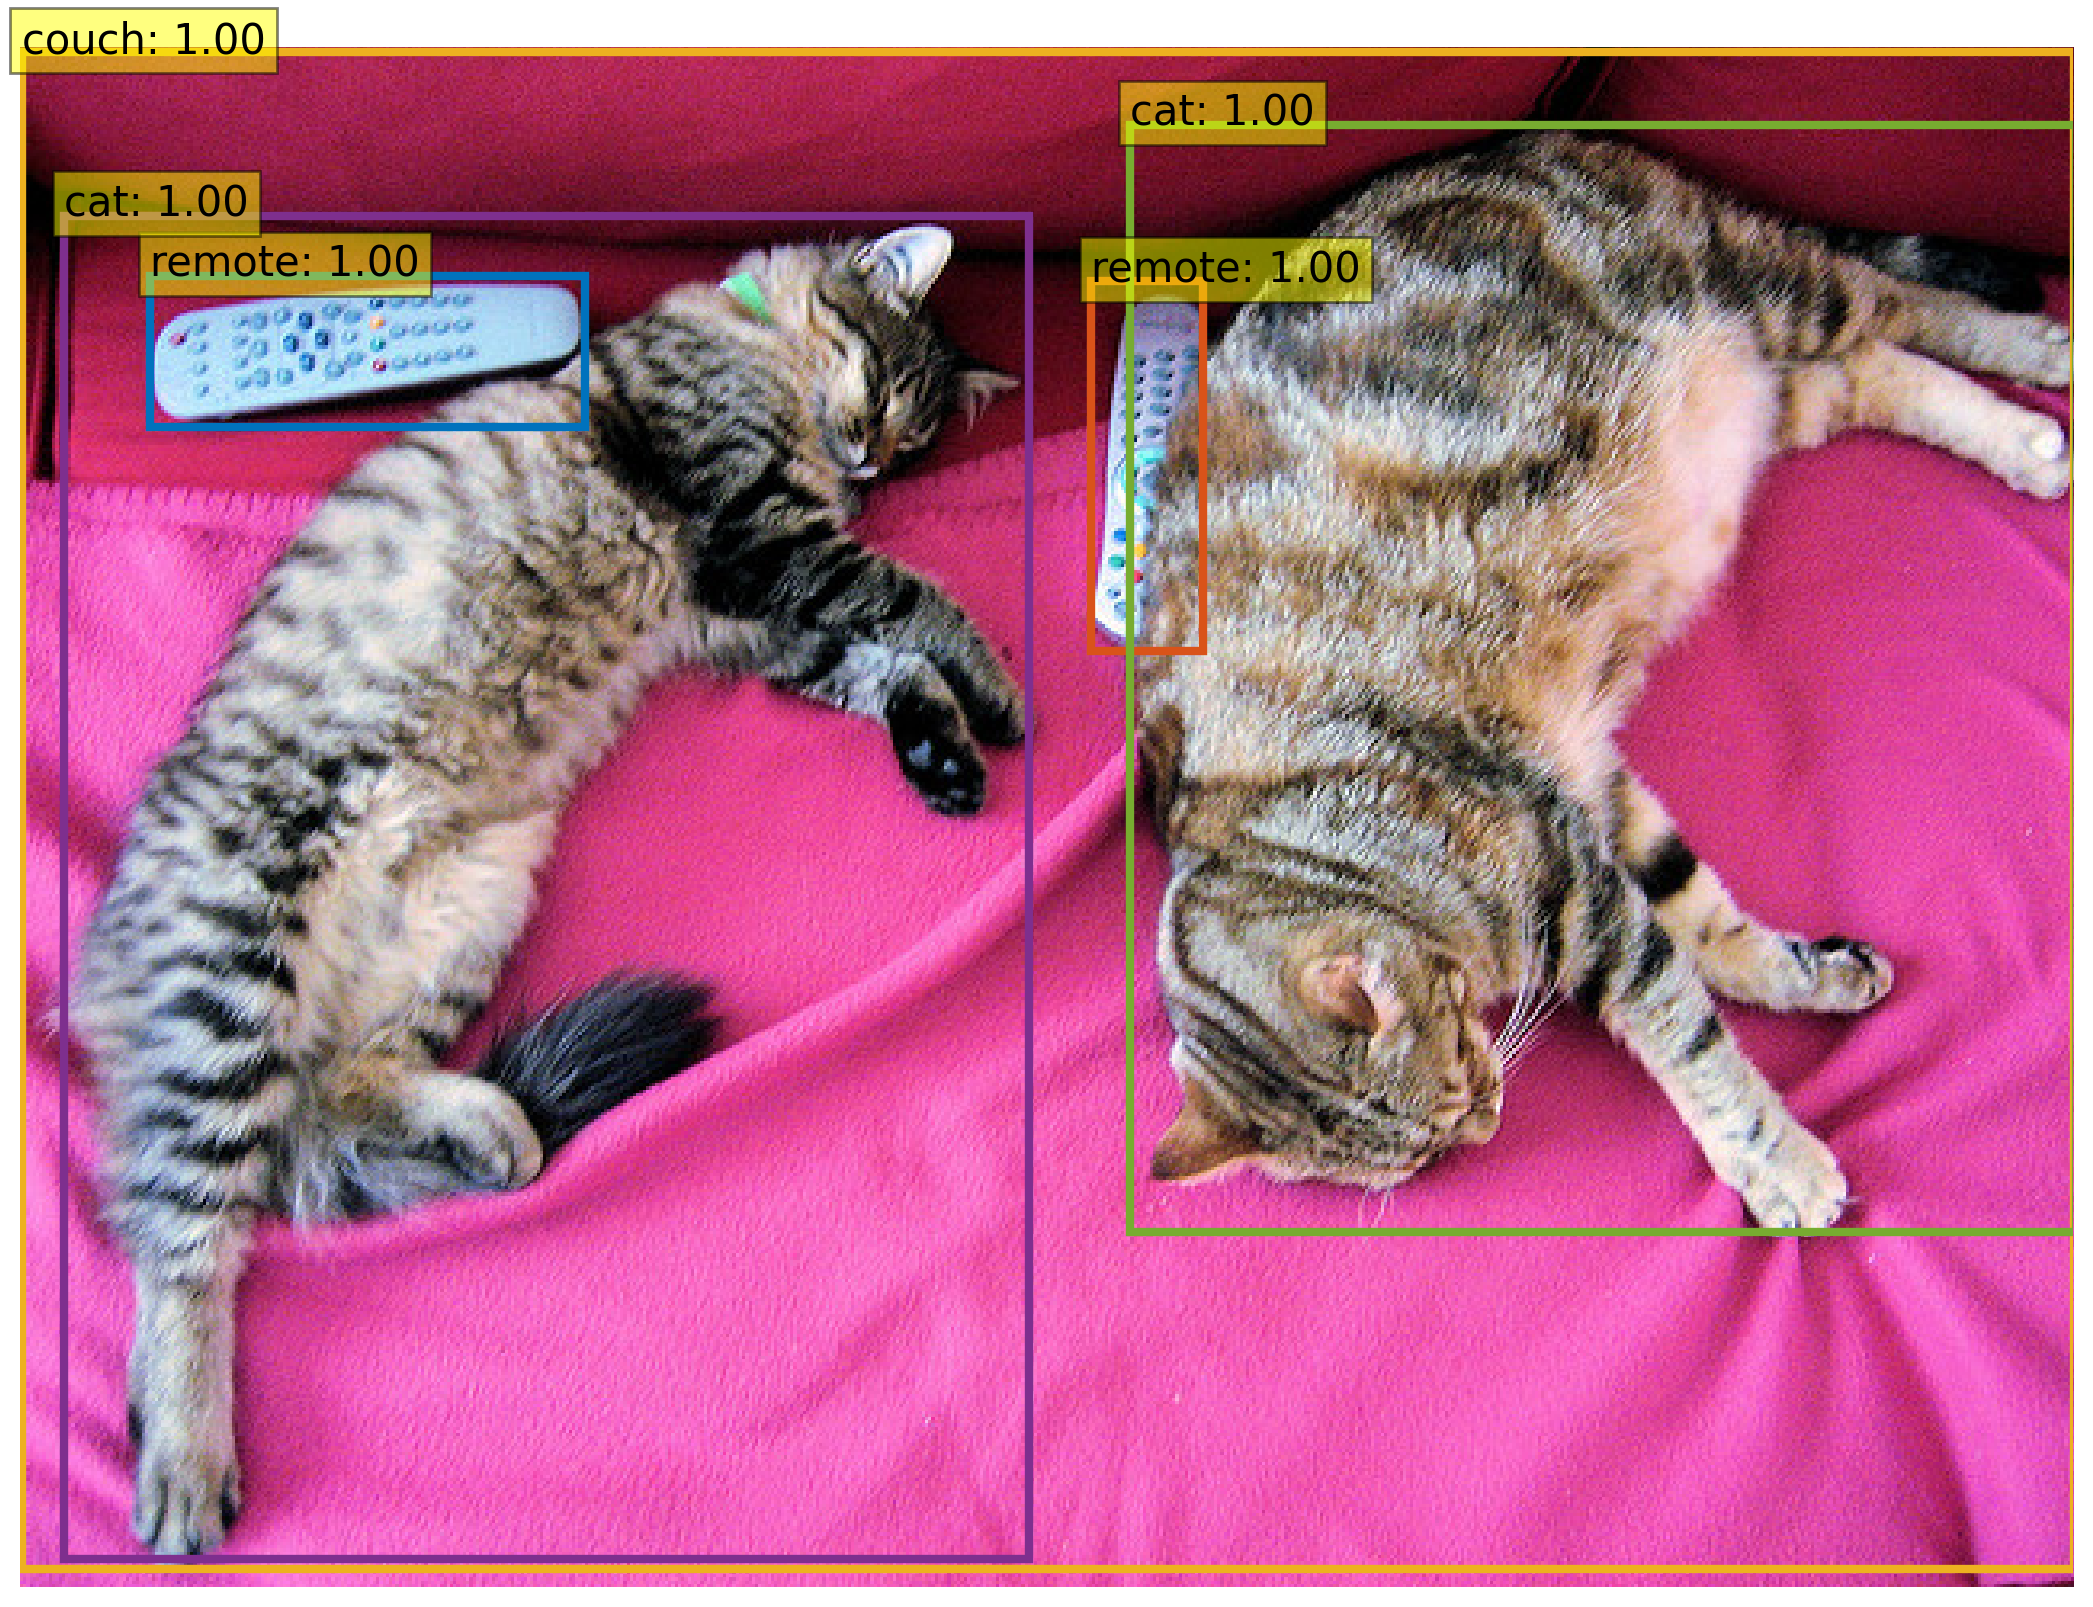

In [29]:
plot_results(im, probas[keep], bboxes_scaled)

In [30]:
# use lists to store the outputs via up-values
conv_features, enc_attn_weights, dec_attn_weights = [], [], []

hooks = [
    model.backbone[-2].register_forward_hook(
        lambda self, input, output: conv_features.append(output)
    ),
    model.transformer.encoder.layers[-1].self_attn.register_forward_hook(
        lambda self, input, output: enc_attn_weights.append(output[1])
    ),
    model.transformer.decoder.layers[-1].multihead_attn.register_forward_hook(
        lambda self, input, output: dec_attn_weights.append(output[1])
    ),
]

# propagate through the model
outputs = model(img)

for hook in hooks:
    hook.remove()

# don't need the list anymore
conv_features = conv_features[0]
enc_attn_weights = enc_attn_weights[0]
dec_attn_weights = dec_attn_weights[0]

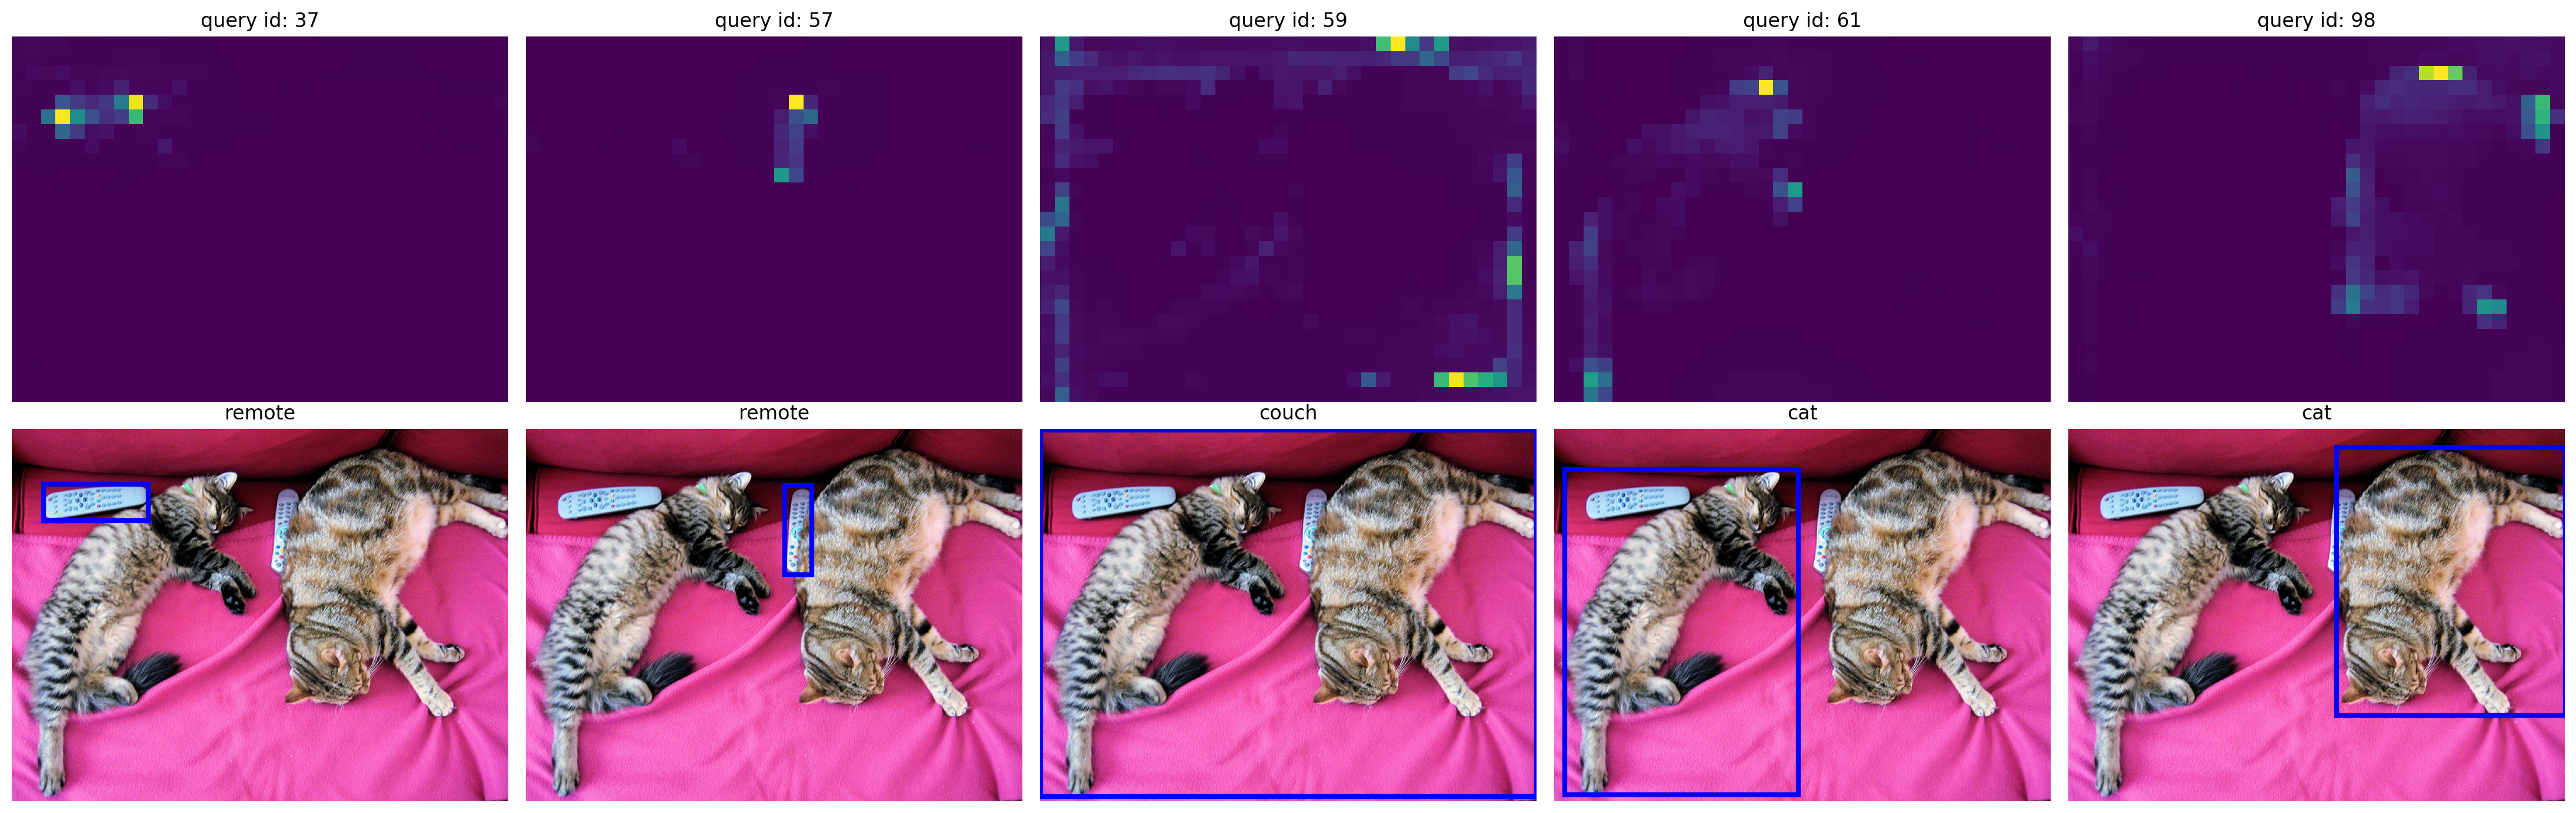

In [31]:
# get the feature map shape
h, w = conv_features['0'].tensors.shape[-2:]

fig, axs = plt.subplots(ncols=len(bboxes_scaled), nrows=2, figsize=(22, 7))
colors = COLORS * 100
for idx, ax_i, (xmin, ymin, xmax, ymax) in zip(keep.nonzero(), axs.T, bboxes_scaled):
    ax = ax_i[0]
    ax.imshow(dec_attn_weights[0, idx].view(h, w))
    ax.axis('off')
    ax.set_title(f'query id: {idx.item()}')
    ax = ax_i[1]
    ax.imshow(im)
    ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                               fill=False, color='blue', linewidth=3))
    ax.axis('off')
    ax.set_title(CLASSES[probas[idx].argmax()])
fig.tight_layout()

In [12]:
pip install pycocotools opencv-python torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 869.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 385.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 3.7 MB/s eta 0:00:00


In [14]:
import os
import random

# Get a list of all the files in the directory
files = os.listdir("COCOdataset2017/images/train/")

# Select a random subset of the files
subset = random.sample(files, 100)

In [16]:
import os
import cv2
import random
from pycocotools.coco import COCO

# Replace with your COCO annotations file path
dataDir = 'COCOdataset2017'
annFile = os.path.join(dataDir, 'annotations/instances_train2017.json')

# Create COCO object for accessing annotations
coco = COCO(annFile)

# **Corrected path to image directory (assuming train subdirectory exists):**
#img_path = os.path.join(dataDir, '/content/COCOdataset2017/images/train')
img_path = os.path.join(dataDir, '/content/COCOdataset2017/images/train/000000001053.jpg')

# Select a random subset of the files
#subset = random.sample(img_path, 20)

# **List image file names (assuming you want to process all images):**
image_filenames = os.listdir(img_path)
#image_filenames = os.listdir(subset)

for image_filename in image_filenames:
  # Construct full image path
  full_image_path = os.path.join(img_path, image_filename)
  #full_image_path = os.path.join(subset, image_filename)

  # Load image using cv2.imread
  im = cv2.imread(full_image_path)

  # Check if image reading was successful (optional)
  if im is None:
    print("Error: Could not read image file:", full_image_path)
    continue  # Skip to the next image if reading fails

  # Further image processing or YOLO integration here (if needed)

  # Display the image for verification (optional)
  plt.imshow(im)
  plt.axis('off')
  plt.show()

  # Additional operations for each image (e.g., saving outputs)


loading annotations into memory...
Done (t=20.21s)
creating index...
index created!


NotADirectoryError: [Errno 20] Not a directory: '/content/COCOdataset2017/images/train/000000001053.jpg'

In [ ]:
'''import os
import cv2
from pycocotools.coco import COCO

# Replace with your COCO annotations file path
dataDir = 'COCOdataset2017'
annFile = os.path.join(dataDir, 'annotations/instances_train2017.json')

# Create COCO object for accessing annotations
coco = COCO(annFile)

# Replace with the image ID or file path
#imgId = 123  # Example image ID
# Alternatively, use image file path if you have image file names:
#img_path = os.path.join(dataDir, 'images/train2017/000000123.jpg')
img_path = os.path.join(dataDir, '/content/COCOdataset2017/images/train')

# Load image based on approach (ID or path)
if os.path.exists(img_path):
    im = cv2.imread(img_path)
else:
    imgIds = coco.getImgIds(imgIds=[imgId])  # Get image IDs if using ID
    #img = coco.loadImgs(imgIds)[0]  # Load image data
    im = cv2.imread(os.path.join(dataDir, 'images/train2017', img['file_name']))

# Display the image for verification (optional)
plt.imshow(im)
plt.axis('off')
plt.show()'''







In [ ]:
import torch

# Assuming your YOLO model expects a specific input size (e.g., 416x416 for YOLOv5)
input_size = 416

# Resize and normalize the image (might differ based on YOLO model requirements)
im_resized = cv2.resize(im, (input_size, input_size))
im_normalized = im_resized.astype(np.float32) / 255.0
im_normalized = np.transpose(im_normalized, (2, 0, 1))  # Convert to channel-first format

# Convert to a PyTorch tensor and add a batch dimension (if needed)
im_tensor = torch.from_numpy(im_normalized).unsqueeze(0)  # Add batch dimension


In [ ]:
# Replace with your YOLO model loading code (might differ based on model implementation)
from yolov7 import Detector  # Example using YOLOv7 (replace with your model class)

# Load YOLO model weights
model = Detector(weights='yolov7.pt')  # Replace with your model weight path

# Perform object detection using the preprocessed image tensor
results = model(im_tensor)


GLUON

In [ ]:
# Install gluoncv
!pip install --upgrade mxnet-cu100 gluoncv

In [ ]:
!wget https://raw.githubusercontent.com/dmlc/gluon-cv/master/scripts/datasets/mscoco.py

In [ ]:
!python mscoco.py --download-dir ./coco

In [ ]:
!wget https://raw.githubusercontent.com/dmlc/gluon-cv/master/scripts/datasets/mscoco.py
!python mscoco.py --download-dir ./coco

In [ ]:
# Download the full COCO dataset
!wget https://gluon-cv.mxnet.io/_downloads/b6ade342998e03f5eaa0f129ad5eee80/mscoco.py
!python mscoco.py --download-dir ./coco

In [ ]:
from gluoncv import data, utils

train_dataset = data.COCODetection(root='./coco', splits=['instances_train2017'])
val_dataset = data.COCODetection(root='./coco', splits=['instances_val2017'])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

In [ ]:
id_ = np.random.randint(0, 117266)
train_image, train_label = train_dataset[id_]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print('Image size (height, width, RGB):', train_image.shape)
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (x_min, y_min, x_max, y_max):\n', bounding_boxes)
print('Class IDs:\n', class_ids)

utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
plt.axis('off'), plt.show();

In [ ]:
im_folder = 'COCOdataset2017/images/train/'

# Download images
for im in tqdm_notebook(images):
    im_path = im_folder + im['file_name']
    if not os.path.exists(im_path):
        urllib.request.urlretrieve(im['coco_url'], im_path)